In [1]:
import pandas as pd
wine = pd.read_csv("https://bit.ly/wine_csv_data")

In [2]:
wine.head()
# class 0이면 레드와인, 1이면 화이트와인

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()
# 열에 대한 통계(count/mean/std/Interquartile range)

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
data = wine[["alcohol","sugar", "pH"]].to_numpy()
target = wine["class"].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [8]:
# 특성값 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [10]:
# 모델 파라미터 확인
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [11]:
# 결정트리분류
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
print(type(dt))
# 가지치기를 안하면 과적합이 발생함

0.996921300750433
0.8592307692307692
<class 'sklearn.tree._classes.DecisionTreeClassifier'>


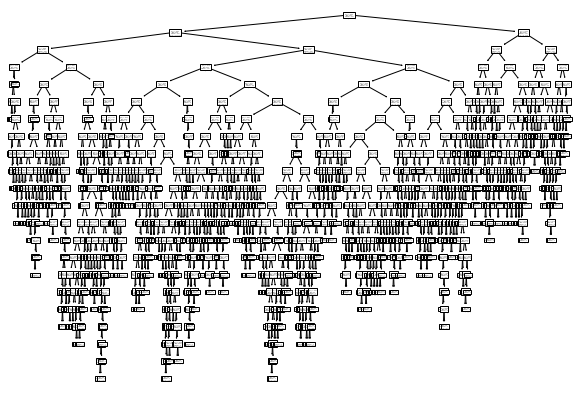

In [12]:
# plot_tree() 메서드 : 결정트리를 그림으로 출력
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

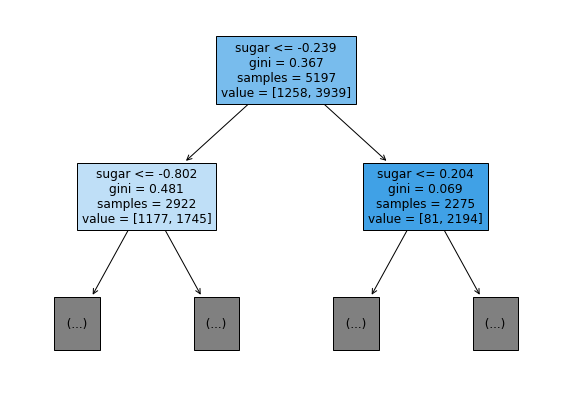

In [13]:
# max_depth 매개변수 : 노드의 층수를 정함
# filled 매개변수 : True인 경우 클래스에 맞게 노드의 색을 칠함
# feature_names 매개변수 : 특성의 이름을 전달함
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=["alcohol", "sugar","pH"])
plt.show()

###가지치기

In [14]:
# 노드의 층수를 3으로 제한함으로써 과대적합을 예방 (= 일반화 )
dt= DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


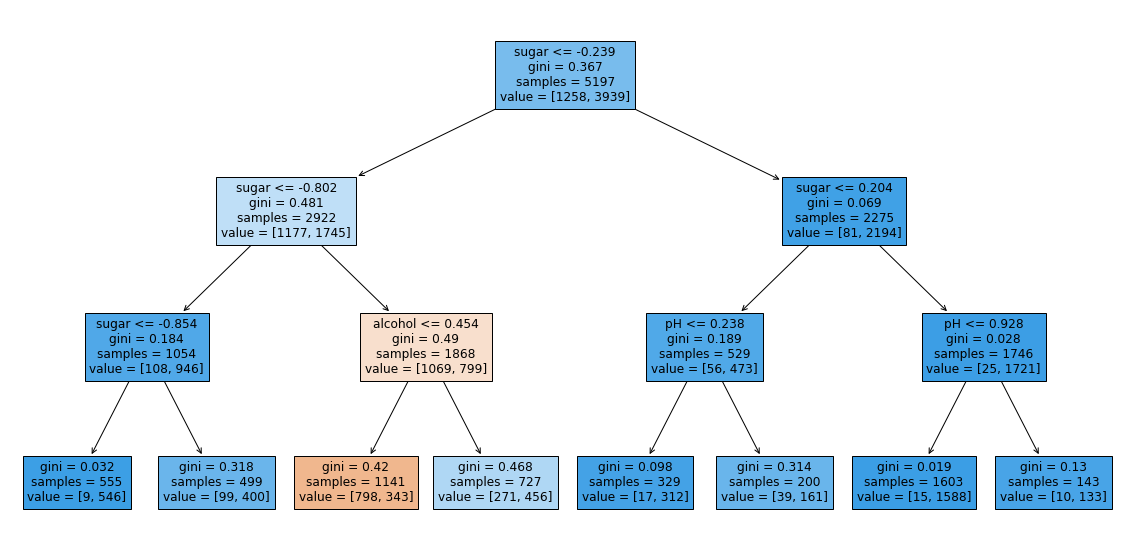

In [15]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=["alcohol","sugar","pH"])
plt.show()

In [16]:
# 특성값을 정규화 안한 데이터로 결정트리 다시 그려보기
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


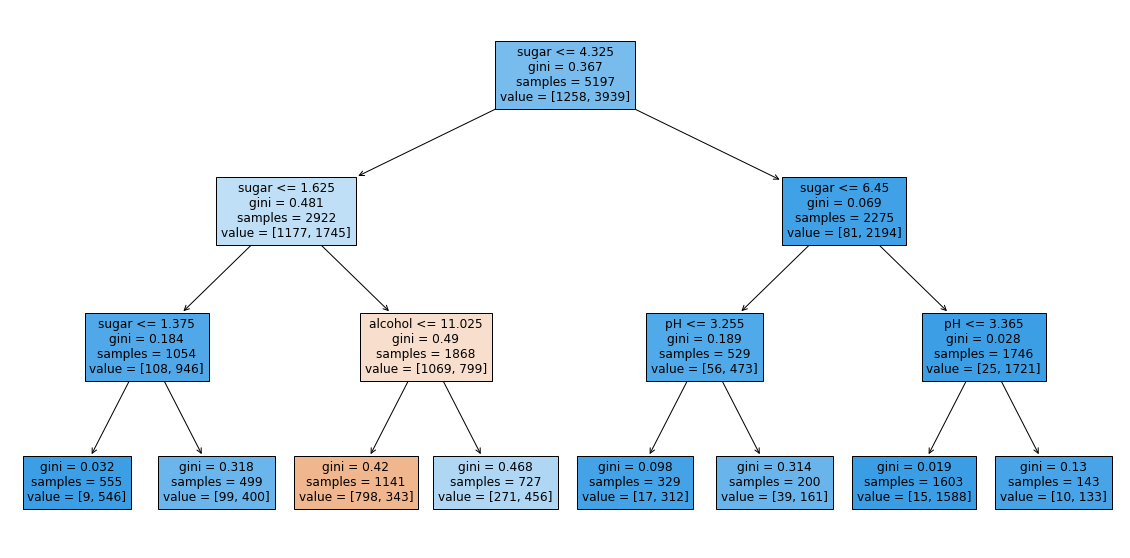

In [18]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=["alcohol","sugar","pH"])
plt.show()
# 분류결과는 변화 없음

In [19]:
# feature_importances_ 특성 : 결정트리의 특성중요도를 계산해줌
# 순서는 feature_names에 입력한대로, alcohol, sugar, pH
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


In [20]:
# 특성 중요도를 전부 합하면 역시나 1
sum(dt.feature_importances_)

0.9999999999999999

0.8874350586877044
0.8615384615384616


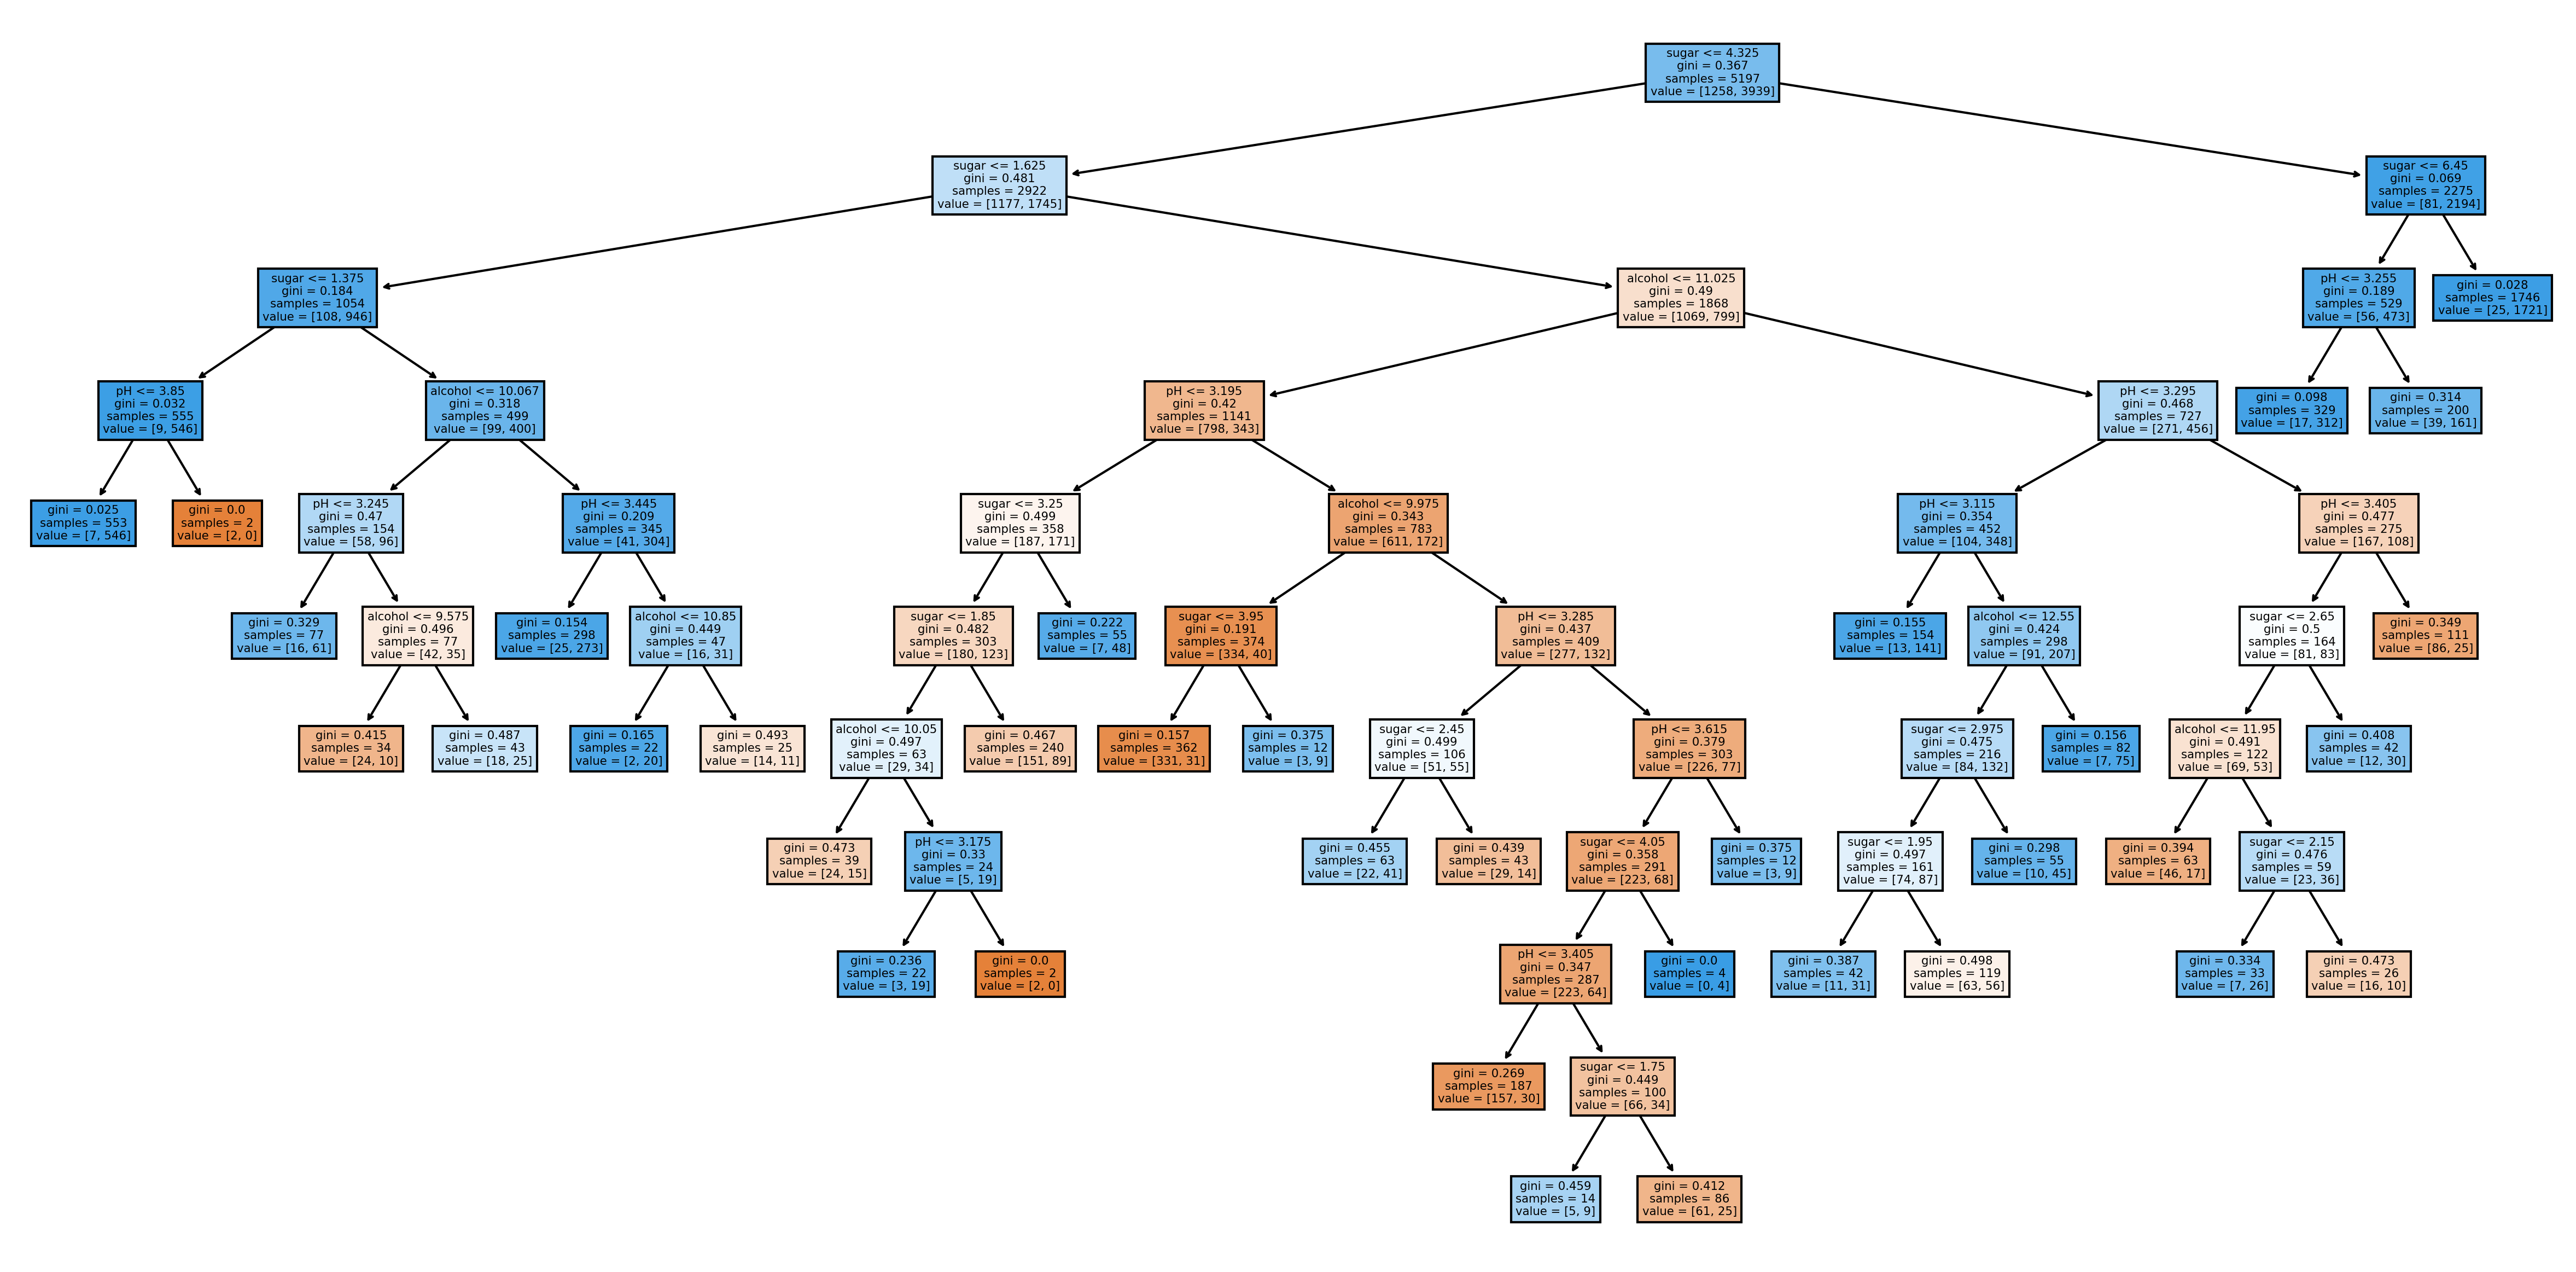

In [21]:
# min_impurity_decrease 매개변수 : 최소 불순도를 결정 ->과적합이 안되도록 규제하는 방법중 하나
dt=DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
plt.figure(figsize=(20,10), dpi=300)
plot_tree(dt, filled=True, feature_names=["alcohol","sugar","pH"])
plt.show()